In [7]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import time
import pickle
#import joblib
from functions.functions import load_data_forGridSearch, feature_scaling_forGridSearch, save_object
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
X_train, y_train = load_data_forGridSearch("../Data", "train")
X_test, y_test = load_data_forGridSearch("../Data", "test")

# feature scaling
X_train_transformed, X_test_transformed = feature_scaling_forGridSearch(X_train, X_test)

In [3]:
rf = RandomForestRegressor(random_state=0, n_estimators=100, warm_start=False, oob_score=False, max_depth=None)
rf.fit(X_train_transformed, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [8]:
# saving the RF model for reuse
# since the model ends up taking several GB of space we comment it out  
# with open('../Models/RF/rf_ne100.sav', 'w') as f:
#     joblib.dump(rf, f)

In [17]:
# this exports a vue of the RF as a graph and was used in the PhD thesis as a figure
from sklearn.tree import export_graphviz
feature_names = ['x', 'y', 'z'] + ['i{}'.format(i+1) for i in range(8)]
export_graphviz(rf[0], '../Models/tree0.dot', max_depth=3, feature_names=feature_names,
               impurity=False)

In [44]:
# here we run the predictions using the RF model and save them later for comparison with 
# the other methods
y_pred = rf.predict(X_test_transformed)
y_pred_train = rf.predict(X_train_transformed)
print("RF model R2 on training set: " + str(r2_score(y_true = y_train, y_pred = y_pred_train)))

y_pred_test = rf.predict(X_test_transformed)
print("RF model R2 on testing set: " + str(r2_score(y_true = y_test, y_pred = y_pred_test)))
#np.save("../Models/RF/GridSearch_RF_predictions.npy", y_pred)

RF model R2 on training set: 0.9048301968070483
RF model R2 on testing set: 0.8070951388334482


In [57]:
splits = np.arange(10,100,10)
N = X_train.shape[0]
r2s = []
for split in splits:
    Ns = int(float(split)/100 * N)
    rf = RandomForestRegressor(random_state=0, n_estimators=100, warm_start=False, oob_score=False, max_depth=None)
    rf.fit(X_train_transformed[0:Ns,:], y_train[0:Ns,:])
    y_pred = rf.predict(X_test_transformed)
    y_pred_train = rf.predict(X_train_transformed[0:Ns,:])
    print("split %d %%: RF model R2 on training set: " %split + str(r2_score(y_true = y_train[0:Ns,:], y_pred = y_pred_train)))

    y_pred_test = rf.predict(X_test_transformed)
    r2_test = r2_score(y_true = y_test, y_pred = y_pred_test)
    print("split %d %%: RF model R2 on testing set: " %split + str(r2_test))
    r2s.append(r2_test)
r2s = np.array(r2)
#np.savez('../Models/RF/splits_rf', splits=splits, r2s=np.array(r2_l))

split 10 %: RF model R2 on training set: 0.995855788253059
split 10 %: RF model R2 on testing set: 0.6259026140162826
split 20 %: RF model R2 on training set: 0.9961369412277646
split 20 %: RF model R2 on testing set: 0.7460148845475513
split 30 %: RF model R2 on training set: 0.9962093406876447
split 30 %: RF model R2 on testing set: 0.7607526962891541
split 40 %: RF model R2 on training set: 0.9963880741185435
split 40 %: RF model R2 on testing set: 0.7850184278917715
split 50 %: RF model R2 on training set: 0.9965099236267321
split 50 %: RF model R2 on testing set: 0.8136218000554974
split 60 %: RF model R2 on training set: 0.9965662261523894
split 60 %: RF model R2 on testing set: 0.8230105765553356
split 70 %: RF model R2 on training set: 0.9966322707659621
split 70 %: RF model R2 on testing set: 0.8384617664495151
split 80 %: RF model R2 on training set: 0.9966140167814596
split 80 %: RF model R2 on testing set: 0.8431189717968753
split 90 %: RF model R2 on training set: 0.996702

In [3]:
results = np.load('splits_rf.npz')
splits = results['splits']
r2s = results['r2s']

Text(0,0.5,'R2')

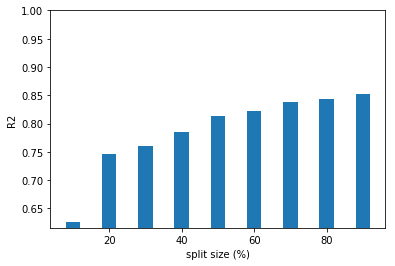

In [4]:
plt.bar(splits, r2s, width=4.)
plt.gca().set_ylim(np.min(r2s)-0.01,1.)
plt.xlabel('split size (%)')
plt.ylabel('R2')

In [62]:
depths = np.arange(5,30,5)
r2s = []
r2s_training = []
for depth in depths:
    print('depth: %d' % depth)
    rf = RandomForestRegressor(random_state=0, n_estimators=20, 
                           warm_start=True, oob_score=False, max_depth=depth, max_features='auto', min_samples_leaf=10)
    rf.fit(X_train_transformed, y_train)
    y_pred = rf.predict(X_test_transformed)
    y_pred_train = rf.predict(X_train_transformed)
    r2_train = r2_score(y_true = y_train, y_pred = y_pred_train)
    print("RF model R2 on training set: " +  str(r2_train))

    y_pred_test = rf.predict(X_test_transformed)
    r2_test = r2_score(y_true = y_test, y_pred = y_pred_test)
    print("RF model R2 on testing set: " + str(r2_test))
    r2s.append(r2_test)
    r2s_training.append(r2_train)
    

depth: 5
RF model R2 on training set: 0.37238966645949917
RF model R2 on testing set: 0.3695447307069097
depth: 10
RF model R2 on training set: 0.7528949421350543
RF model R2 on testing set: 0.6814416467264198
depth: 15
RF model R2 on training set: 0.9323078595211545
RF model R2 on testing set: 0.8217552180433912
depth: 20
RF model R2 on training set: 0.9434670572420213
RF model R2 on testing set: 0.8285122363365219
depth: 25
RF model R2 on training set: 0.9435341893921891
RF model R2 on testing set: 0.8280007612515403


Text(0.5,0,'max depth')

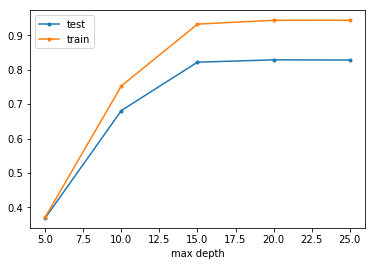

In [63]:
#r2s_training = [0.3764785128067188, 0.7587822370319639, 0.9570514653588069]
plt.plot(depths, r2s, '-', marker='.')
plt.plot(depths, r2s_training, '-', marker='.')
plt.legend(('test', 'train'))
plt.xlabel('max depth')

In [43]:
for mf in [0.1, 0.3, 1.0]:
    print('mf: %.1f' % mf)
    rf = RandomForestRegressor(random_state=0, n_estimators=20, 
                               warm_start=True, oob_score=False, max_depth=15, max_features=mf, min_samples_leaf=2)
    #rf.set_params(n_estimators=50)
    rf.fit(X_train_transformed, y_train)
    y_pred = rf.predict(X_test_transformed)
    y_pred_train = rf.predict(X_train_transformed)
    print("RF model R2 on training set: " +  str(r2_score(y_true = y_train, y_pred = y_pred_train)))

    y_pred_test = rf.predict(X_test_transformed)
    r2_test = r2_score(y_true = y_test, y_pred = y_pred_test)
    print("RF model R2 on testing set: " + str(r2_test))

mf: 0.1
RF model R2 on training set: 0.872868159921928
RF model R2 on testing set: 0.7174801943944701
mf: 0.3
RF model R2 on training set: 0.9325162484943651
RF model R2 on testing set: 0.818679576582659
mf: 1.0
RF model R2 on training set: 0.9541123709072736
RF model R2 on testing set: 0.8345953889642413


In [68]:
r2s = []
r2s_training = []
for msl in [1, 2, 5, 10, 15]:
    print('msl: %d' % msl)
    rf = RandomForestRegressor(random_state=0, n_estimators=20, 
                               warm_start=True, oob_score=False, max_depth=15, max_features='auto', min_samples_leaf=msl)
    rf.fit(X_train_transformed, y_train)
    y_pred = rf.predict(X_test_transformed)
    y_pred_train = rf.predict(X_train_transformed)
    r2_train = r2_score(y_true = y_train, y_pred = y_pred_train)
    print("RF model R2 on training set: " +  str(r2_train))

    y_pred_test = rf.predict(X_test_transformed)
    r2_test = r2_score(y_true = y_test, y_pred = y_pred_test)
    print("RF model R2 on testing set: " + str(r2_test))
    r2s.append(r2_test)
    r2s_training.append(r2_train)

msl: 1
RF model R2 on training set: 0.9553948965701714
RF model R2 on testing set: 0.8370380052573352
msl: 2
RF model R2 on training set: 0.9541123709072736
RF model R2 on testing set: 0.8345953889642413
msl: 5
RF model R2 on training set: 0.9469327017019576
RF model R2 on testing set: 0.830685145460604
msl: 10
RF model R2 on training set: 0.9323078595211545
RF model R2 on testing set: 0.8217552180433912
msl: 15
RF model R2 on training set: 0.9186119511472682
RF model R2 on testing set: 0.8115642809159708


Text(0.5,0,'min samples leaf')

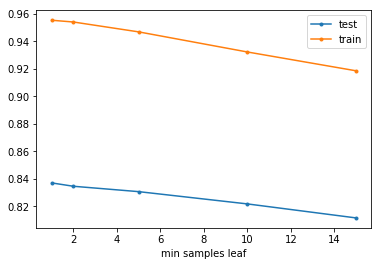

In [73]:
plt.plot([1, 2, 5, 10, 15], r2s, '-', marker='.')
plt.plot([1, 2, 5, 10, 15], r2s_training, '-', marker='.')
plt.legend(('test', 'train'))
plt.xlabel('min samples leaf')

In [74]:
n_estimator_l = np.arange(2,50,5)
r2s = []
r2s_training = []
rf = RandomForestRegressor(random_state=0, n_estimators=1, 
                       warm_start=True, oob_score=False, max_depth=15, max_features='auto', min_samples_leaf=10)
for ne in n_estimator_l:
    print('n_estimators: %d' % ne)
    rf.set_params(n_estimators=ne)
    rf.fit(X_train_transformed, y_train)
    y_pred = rf.predict(X_test_transformed)
    y_pred_train = rf.predict(X_train_transformed)
    r2_train = r2_score(y_true = y_train, y_pred = y_pred_train)
    print("RF model R2 on training set: " +  str(r2_train))

    y_pred_test = rf.predict(X_test_transformed)
    r2_test = r2_score(y_true = y_test, y_pred = y_pred_test)
    print("RF model R2 on testing set: " + str(r2_test))
    r2s.append(r2_test)
    r2s_training.append(r2_train)

n_estimators: 2
RF model R2 on training set: 0.8981884221101176
RF model R2 on testing set: 0.7329458994879747
n_estimators: 7
RF model R2 on training set: 0.9218708555974109
RF model R2 on testing set: 0.787633956274281
n_estimators: 12
RF model R2 on training set: 0.9296379535268002
RF model R2 on testing set: 0.8138208020411671
n_estimators: 17
RF model R2 on training set: 0.9315262306608542
RF model R2 on testing set: 0.8187576800269669
n_estimators: 22
RF model R2 on training set: 0.9329470549227535
RF model R2 on testing set: 0.8242358149698856
n_estimators: 27
RF model R2 on training set: 0.9337095135305596
RF model R2 on testing set: 0.8257545316169415
n_estimators: 32
RF model R2 on training set: 0.934017583922525
RF model R2 on testing set: 0.827342121129898
n_estimators: 37
RF model R2 on training set: 0.9343687302515967
RF model R2 on testing set: 0.8282261286279828
n_estimators: 42
RF model R2 on training set: 0.9345824617556698
RF model R2 on testing set: 0.82803458104738

Text(0.5,0,'num estimators')

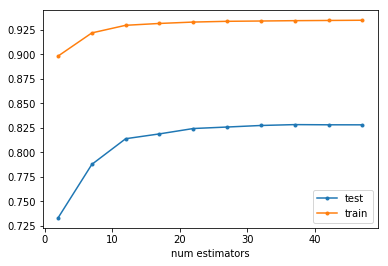

In [75]:
plt.plot(n_estimator_l, r2s, '-', marker='.')
plt.plot(n_estimator_l, r2s_training, '-', marker='.')
plt.legend(('test', 'train'))
plt.xlabel('num estimators')